<a href="https://colab.research.google.com/github/EllaThomasson/labs-ds3001/blob/main/LinRegLab_EllaThomasson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 0**

**Part 1**

A linear model should be linear in Betas.

**Part 2**

With everything else in the model held constant, the prediction for the response is the intercept when the class of the observation is the reference class. If the class of the observation is not the reference class, the predicted response is expected to increases/decrease (slope) units compared to when theclass is the reference category.
Summary:
1. For the reference category: The predicted response is the intercept.
2. For other categories: The predicted response is the intercept plus the coefficient of the dummy variable, reflecting an increase or decrease compared to the reference category.

**Part 3**

Yes, linear regression technically can be used for classification but it is generally not advised because of interpretation and assumption violations. Logistic regression should be used for classification.

**Part 4**

If a linear model is overfitting, the training set will perform much better than the testing set. Additionally, extremely large coefficients in your model can indicate that the model is fitting the noise in the data rather than the signal. Lastly, a linear model may be overfitting if small changes in the training data lead to large changes in model predictions.

**Part 5**

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can lead to unreliable estimates of coefficients and inflated standard errors. In other words, it occurs when predictor variables are giving redundant information, so even if the data is really good (and you have really great variables), this may not be refrected in the model\predictions using the model.

In terms of two-stage least squares. in many cases, multicollinearity can arise from endogeneity, where an independent variable is correlated with the error term due to omitted variable bias, measurement errors, or simultaneous relationships. When multicollinearity exists alongside endogeneity, traditional methods like Ordinary Least Squares (OLS) can yield biased estimates.

**Part 6**

You can add interaction terms or higher order terms to your linear regression model. You could also use a different type of model like a decision trees or knn.

**Part 7**

When all of the variables are 0 (or the reference class for categorical variables), the response variable is -.
When all other variables are held constant, for a one unit increase in -, the response is predicted to increase by -.
The coefficients of the one-hot encoded variables represent the change in the dependent variable relative to the reference category. For example, the value being - increases the predicted value of the dependent variable by slope units compared to being the reference category.

# **Question 1**

In [1]:
! git clone https://github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 66 (delta 20), reused 11 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (66/66), 2.64 MiB | 7.56 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv', low_memory=False)

In [4]:
df.head(5)

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [5]:
print(df.columns)

Index(['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type',
       'Room Type'],
      dtype='object')


**Part 1**

In [6]:
average_stats = df.groupby('Neighbourhood ').agg(average_price=('Price', 'mean'),average_score=('Review Scores Rating', 'mean')).reset_index()

average_stats.sort_values(by='average_price', ascending=False)

,Neighbourhood,average_price,average_score
2,Manhattan,183.664286,91.801496
4,Staten Island,146.166667,90.843750
1,Brooklyn,127.747378,92.363497
3,Queens,96.857233,91.549057
0,Bronx,75.276498,91.654378


Manhattan is the most expensive borough on average.

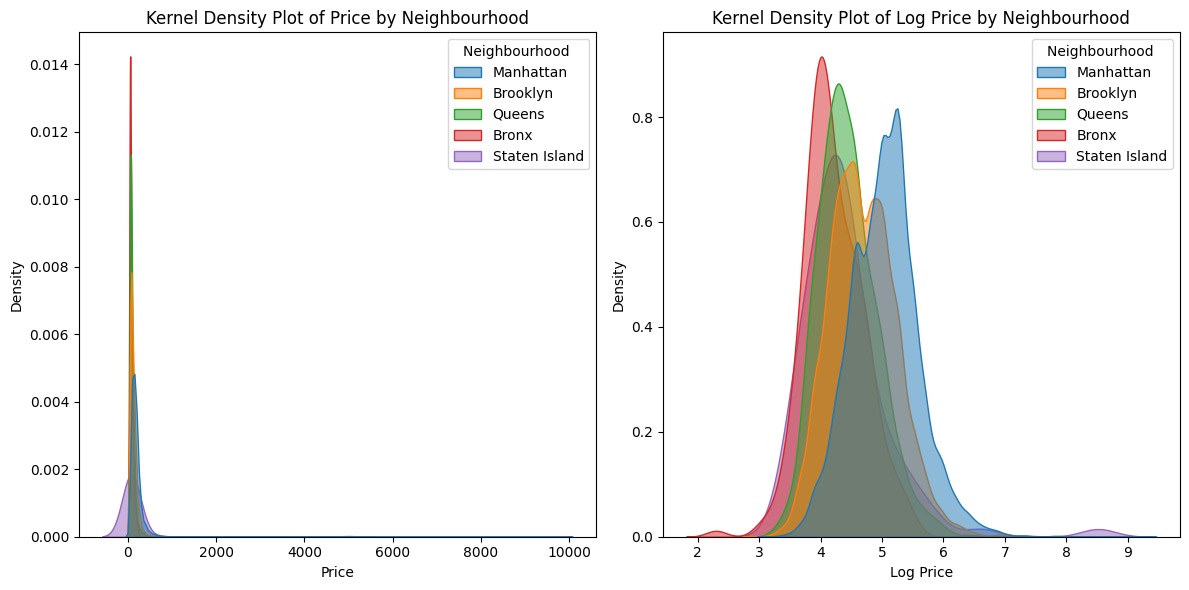

In [7]:
df['log_price'] = np.log(df['Price'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Price', hue='Neighbourhood ', common_norm=False, fill=True, alpha=0.5)
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='log_price', hue='Neighbourhood ', common_norm=False, fill=True, alpha=0.5)
plt.title('Kernel Density Plot of Log Price by Neighbourhood')
plt.xlabel('Log Price')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


The log price kernel density plot looks much better.

**Part 2**

In [8]:
one_hot_encoded = pd.get_dummies(df['Neighbourhood '], prefix='neighborhood', dtype='int')
data = pd.concat([df, one_hot_encoded], axis=1)
data.drop('Neighbourhood ', axis=1, inplace=True)

In [9]:
data.head(5)

,Price,Review Scores Rating,Property Type,Room Type,log_price,neighborhood_Bronx,neighborhood_Brooklyn,neighborhood_Manhattan,neighborhood_Queens,neighborhood_Staten Island
0,549,96.0,Apartment,Private room,6.308098,0,0,1,0,0
1,149,100.0,Apartment,Entire home/apt,5.003946,0,1,0,0,0
2,250,100.0,Apartment,Entire home/apt,5.521461,0,0,1,0,0
3,90,94.0,Apartment,Private room,4.499810,0,1,0,0,0
4,270,90.0,Apartment,Entire home/apt,5.598422,0,0,1,0,0


In [10]:
X = one_hot_encoded
y = data['Price']

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # Run regression

results = pd.DataFrame({'Neighborhood':reg.feature_names_in_, 'Coefficient': reg.coef_}) # Regression coefficients
results

,Neighborhood,Coefficient
0,neighborhood_Bronx,75.276498
1,neighborhood_Brooklyn,127.747378
2,neighborhood_Manhattan,183.664286
3,neighborhood_Queens,96.857233
4,neighborhood_Staten Island,146.166667


The means from part 1 are the same as the coefficients shown when Neighborhoods is regressed on Price. The regression is seems to be computing the group averages, since we have no other variables within the model. Conversely, the regression coefficients for dummy variables are a group mean, controlling for everything else in the regression.

**Part 3**

In [11]:
one_hot_encoded = pd.get_dummies(df['Neighbourhood '], prefix='neighborhood', dtype='int', drop_first=True)

X = one_hot_encoded
y = data['Price']

reg = linear_model.LinearRegression(fit_intercept=True).fit(X,y) # Run regression

results = pd.DataFrame({'Neighborhood':reg.feature_names_in_, 'Coefficient': reg.coef_}) # Regression coefficients
results

,Neighborhood,Coefficient
0,neighborhood_Brooklyn,52.470881
1,neighborhood_Manhattan,108.387789
2,neighborhood_Queens,21.580735
3,neighborhood_Staten Island,70.890169


In [12]:
print(reg.intercept_)

75.27649769585331


It dropped the Bronx, so Bronx is now the reference category. Bronx's coefficient from the previous regression becomes the value of the intercept. All the coefficients for this regression are now relative to the Bronx. Adding the regression coefficient values to the intercept will give the coefficients from the previous regression.

ex:
Brooklyn Coef now + Intercept now = Brooklyn Coef Before


**Part 4**

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

In [15]:
Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

In [16]:
y_pred = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_pred)**2 ))
print('RMSE: ', rmse) # R2

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


In [17]:
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [18]:
100*1.032257 + 89.421

192.6467

The most expensive type of property you can rent is a 100-rated place in Manhattan.

**Part 5**

In [19]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

In [21]:
Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

In [22]:
y_pred = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_pred)**2 ))
print('RMSE: ', rmse)

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


In [23]:
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [24]:
110.617+53.69+100*.0626

170.567

The most expensive type of property you can rent is a 100-rated place in Manhattan that is an entire appartment.

Part 6

The coefficient on Review Score Rating decreased from part 4 to part 5. Some of tha variation explained by Review Score Rating is also explained by Room Type, so when Room Type is added to the model, the coefficient of Review Score Rating decreased.  In other words, once we control for room type, the other variables become less powerful predictors because some of their predictive power is correlated with room type. That's why the coefficient on rating shrinks.

Part 7

Didn't have time